In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from numpy import average
import os

In [44]:
# Path_To_Basic_Player_Stats_By_Year = input('Enter the path to the Basic Player Stats By Year Directory.')

Path_To_Basic_Player_Stats_By_Year = '/Users/chaseallbright/Dropbox/NBA/NBA Data/Data/Basic Player Stats By Year/'


os.chdir(Path_To_Basic_Player_Stats_By_Year)

i = os.walk(os.getcwd())

file_list = []
for j in i:
    file_list.append(j)
    

file_list = file_list[0][2]


df_list = []
for f in file_list:
    df_list.append(pd.read_csv(f,index_col=0,sep=','),)


df_list[0].head(5)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

# Weighted FG%
This cell plots league fg% over time as well as a weighted field goal percentage based on which players took the most shots.

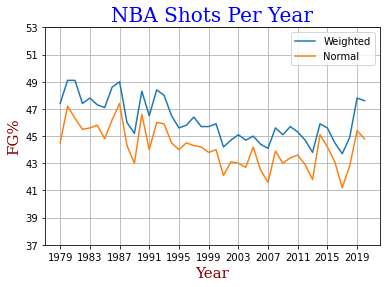

In [8]:
weighted_fga = []
regular_fga = []

for i in df_list:
    fga = list(i.FGA)
    g = list(i.G)
    fg_percent = list(i['FG%'])


    i['FG%'] = i['FG%'].fillna(0)

    for j in range(len(g)):
        fga[j] = g[j] * fga[j]

    total_fga = sum(fga)

    player_weights = [i/total_fga for i in fga]
    
    player_weights = list(pd.DataFrame(player_weights).fillna(0)[0])

    
    weighted_fga.append(round(average(fg_percent, weights = list(player_weights)),3))
    regular_fga.append(round(average(i['FG%']),3))

weighted_fga =[j*100 for j in weighted_fga]
regular_fga =[j*100 for j in regular_fga]

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}



plt.plot([i for i in range(1979,2021)],weighted_fga,label='Weighted')
plt.plot([i for i in range(1979,2021)],regular_fga,label='Normal')

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(1979,2021,4))
plt.yticks(range(37,55,2))

plt.title("NBA Shots Per Year", fontdict = font1)
plt.xlabel("Year", fontdict = font2)
plt.ylabel("FG%", fontdict = font2)

plt.savefig('Weighted FG%.png',dpi=300)